In [11]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.5, rc={'figure.figsize':(12, 6)})

# for custom notebook formatting.
from IPython.core.display import HTML
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))
HTML(open('../custom.css').read())


<br><br><br>

## Natural Language Processing
### :::: Machine Learning ::::


<br><br><br><br><br><br><br><br><br><br><br><br>


## What is machine learning?

- [Dietterich: "Machine Learning"](http://web.engr.oregonstate.edu/~tgd/publications/nature-ecs-machine-learning.pdf)
- [Domingos: "A few useful things to know about machine learning"](http://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
<br><br><br><br><br>


## What is machine learning?

"Study of methods for programming computers to learn." 

-- Dietterich

<br><br><br><br><br>


## What is machine learning?

Study of systems that "automatically learn programs from data" 

-- Domingos

<br><br><br><br><br>


## What is machine learning?

A problem-solving technique that solves future problem instances based on
patterns found in past problem instances

<br><br><br><br><br>

##  Many applications of ML

| | |
|--|--|
|<img src='figs/spam.png'/>    | <img src='figs/search.png'/>|
|<img src="figs/netflix.png"/> | <img src='figs/bw.png'/> |
|<img src='figs/car.jpg'/>     | <img src='figs/money.png'/> |
|<img src='figs/doc.png'/>     | <img src='figs/siri.png'/> |


<br><br><br>

## Notation

- $\vec{x} \in \mathcal{X}$ &nbsp;&nbsp;&nbsp;&nbsp; *instance*, *example*, *input*
  - e.g., an email
- $y \in \mathcal{Y}$ &nbsp;&nbsp;&nbsp;&nbsp; *target*, *class*, *label*, *output*
  - e.g., $y=1$: spam ; $y=0$: not spam
- $f: \mathcal{X} \mapsto \mathcal{Y}$ &nbsp;&nbsp;&nbsp;&nbsp; *hypothesis*, *learner*, *model*, *classifier*
  - e.g., if $x$ contain the word *free*, $y$ is $1$.
  
  <br><br><br><br><br>

## Problem types

- **Classification**
  - $\vec{x}$: email ;  $y$: spam or not
- **Regression**
  - $\vec{x}$: twitter feed of a person ; $y$: age
- **Clustering**
  - $\vec{x}$: news articles ; $y$: topics
- **Structured classification**
  - $\vec{x}$: sentence ; $\vec{y}$: part-of-speech tags
  - $\vec{x}$: sentence ; $\vec{y}$: parse tree
  
  <br><br><br><br><br>

## Workflow

1. **Collect** raw data: emails
2. Manually **categorize** them:  spam or not
3. **Vectorize**: email -> word counts [**features**]
4. **Train** / **Fit**: create $f(x)$
5. **Collect** new raw data
6. **Predict**: compute $f(x)$ for new $x$

<br><br><br><br><br>

## Example: Spam Classification

**Steps 1 & 2: Collect and categorize**

**Spam:**

> Free credit report!


> Free money!


**Not spam:**

> Are you free tonight?

> How are you?


**Step 3: Vectorize**

> 'Free money!'

becomes

```
free: 1
money: 1
!: 1
?: 0
credit: 0
...
```

**Representation**: "Feature engineering is the key" -- Domingos

Why is this (seemingly) a terrible representation of a document?

<br><br><br>

![bow](figs/bow.png)


**Step 4: Train/Fit**

Which model to use?

- Naive Bayes
- Logistic Regression
- Decision Tree
- K-Nearest Neighbors
- Support Vector Machines
- (Deep) Neural Networks
- ... many many more

**Steps 5-6: Predict on new data**

> Free vacation!

**Spam**

How do you know if it works?

In [3]:
# X: each row is a feature vector for one document.
X = [(0, 0),
     (1, 0),
     (0,3),
     (1,3)]
# y: element i is a label for ith document
y = [0, 0, 1, 1]

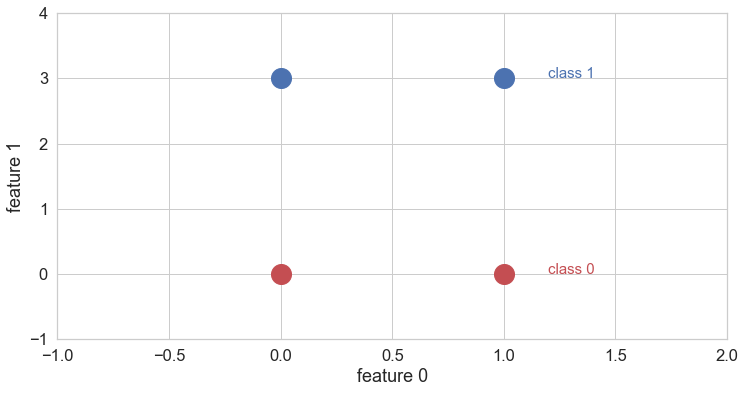

In [12]:
# Plot the data. 
# Red means class 0, blue means class 1.

def plot_data(X, y):
    """ Assumes 2-d data. """
    plt.figure()
    for xi, yi in zip(X, y):
        color = 'r' if yi == 0 else 'b'
        plt.plot(xi[0], xi[1], color + 'o', ms=20)
    plt.xlabel('feature 0')
    plt.ylabel('feature 1')
    plt.xlim((-1,2))
    plt.ylim((-1, 4))
    plt.annotate('class 0', xy=(1.2, 0), color='r', size=15)
    plt.annotate('class 1', xy=(1.2, 3), color='b', size=15)
    plt.show()
    
plot_data(X, y)

In [7]:
# Simplest machine learning algorithm:

class SimplestMachine:
    
    def __init__(self):
        self.f = dict()

    def train(self, X, y):
        for xi, yi in zip(X, y):
            self.f[xi] = yi

    def predict(self, x):
        return self.f[x]

# What does this do?









In [6]:
# What does zip do?
[x for x in zip([1, 2, 3], ['a', 'b', 'c', 'd'])]

[(1, 'a'), (2, 'b'), (3, 'c')]

In [15]:
def print_predictions(predictions, y):
    display(pd.DataFrame(zip(predictions, y), columns=['predicted', 'truth']))

In [16]:
simplest_machine = SimplestMachine()
simplest_machine.train(X, y)
predictions = [simplest_machine.predict(xi) for xi in X]
print_predictions(predictions, y)







,predicted,truth
0,0,0
1,0,0
2,1,1
3,1,1


In [17]:
# What does it do for unseen example?
simplest_machine.predict((0, 4))






KeyError: (0, 4)

In [18]:
# Second simplest machine learning algorithm:
class SimpleMachine:

    def __init__(self):
        self.f = dict()

    def train(self, X, y):
        for xi, yi in zip(X, y):
            self.f[xi] = yi

    def predict(self, x):
        x_closest = self.find_most_similar(x)
        return self.f[x_closest]
    
    def find_most_similar(self, x):
        distances = [self.distance(x, xi) for xi in self.f.keys()]
        best_idx = np.argmin(distances)
        return list(self.f.keys())[best_idx]

    def distance(self, x, xi):
        return np.sqrt(np.sum((np.array(x)-np.array(xi))**2))
        
# What does this do?


**Euclidean distance:**   

```
(0, 3)
(1, 5)
```

$$\sqrt{(0-1)^2 + (3-5)^2} = \sqrt{5}$$


In [19]:
simple_machine = SimpleMachine()
simple_machine.train(X, y)
predictions = [simple_machine.predict(xi) for xi in X]
print_predictions(predictions, y)




,predicted,truth
0,0,0
1,0,0
2,1,1
3,1,1


In [20]:
# What does it do for unseen example?
simple_machine.predict((0, 4))






1

<img src='figs/knn.png' width='80%'/>

<http://www.scholarpedia.org/article/K-nearest_neighbor>


## Generalization

How accurate will I be on a new, unobserved example?

How do you know if it works?

1. Train on data ${\mathcal D_1}$
2. Predict on data ${\mathcal D_2}$
3. Compute accuracy on ${\mathcal D_2}$.
   - Why not ${\mathcal D_1}$?

How do you know if it works?

1. Train on data ${\mathcal D_1}$
2. Predict on data ${\mathcal D_2}$
3. Compute accuracy on ${\mathcal D_2}$.
4. Tweak algorithm / representation
5. Repeat

How do you know if it works?

1. Train on data ${\mathcal D_1}$
2. Predict on data ${\mathcal D_2}$
3. Compute accuracy on ${\mathcal D_2}$.
4. Tweak algorithm / representation
5. Repeat

How many times can I do this?


## Measuring Generalization

- Cross-validation
  - train on 90%, test on 10%, repeat 10 x's
       - each example appears only once in test set
       
       
<p><a href="https://commons.wikimedia.org/wiki/File:K-fold_cross_validation_EN.svg#/media/File:K-fold_cross_validation_EN.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/1200px-K-fold_cross_validation_EN.svg.png" alt="K-fold cross validation EN.svg"></a><br><font size=-2>By <a href="//commons.wikimedia.org/w/index.php?title=User:Gufosowa&amp;action=edit&amp;redlink=1" class="new" title="User:Gufosowa (page does not exist)">Gufosowa</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=82298768">Link</a></font></p>


## Experimental Design

1. Collect data
2. Build model
3. Compute cross-validation accuracy
4. Tune model
5. Repeat


## Experimental Design

1. Collect data
2. Build model
3. Compute cross-validation accuracy
4. Tune model
5. Repeat
6. **Report accuracy on new data**


- What is overfitting? How do you know it is happening? How do you fix?


<img src="https://hackernoon.com/hn-images/1*SBUK2QEfCP-zvJmKm14wGQ.png"/>


<img src="https://hackernoon.com/hn-images/1*xWfbNW3arf39wxk4ZkI2Mw.png"/>

[source](https://hackernoon.com/memorizing-is-not-learning-6-tricks-to-prevent-overfitting-in-machine-learning-820b091dc42)


If overfitting:
- get more labeled data
- reduce complexity of model (fewer parameters)
- stop the training function early

If underfitting:
- increase complexity of model (more parameters)
- let the training function run longer



<br><br>

Let's look at another slightly more interesting classifier...

<br><br><br>

## Naive Bayes Classifier


To estimate our model, we are given training data $D = \{(\vec{x}_1, y_1), \ldots, (\vec{x}_n, y_n)\}$

||free|money| |*label*|
|:--:|:--------:|:--------:|:--:|:--:|
||$x_{i1}$|$x_{i2}$| | $y_i$ |
|$x_1$|0|0||-1| 
|$x_2$|1|0|| 1|
|$x_3$|1|1||-1|
|$x_4$|1|0||-1|
|$x_5$|1|1||1|
|$x_6$|0|0||1|
|$x_7$|0|1||-1|

How to classify a new instance?  
 "free money" -> $\{1,1\}$


One approach: estimate the probability $p(y \mid \vec{x})$

e.g., $p(y=1 \mid \vec{x}=\{1,1\})$

("What is the probability that this document is spam ($y=1$) given the document represented by vector $\vec{x}$?")

Thus, to classify an instance $\vec{x}$, we need $p(y \mid \vec{x})$.

E.g., if $p(y=1 \mid \vec{x}) > p(y=-1 \mid \vec{x})$, then classify $\vec{x}$ as 1.



## Conditional probability

Recall the definition of a conditional probability:

$$ p(y \mid x) = \frac{p(x,y)}{p(x)}$$

"the probability of $y$ *given* $x$ is equal to the probability of $y$ *and* $x$ divided by the probability of $x$"

> Of 100 students, 
>  - 40 got an A on Test 1
>  - 30 got an A on Test 2
>  - 20 got As on boths Tests 1 and 2

> If a student chosen at random got an A on Test 1, what is the probability they also got an A on Test 2?

<br><br>

$$ P(T2=A \mid T1=A)$$

<br><br>

$$P(T2=A \mid T1=A) = \frac{P(T1=A, T2=A)}{P(T1=A)} = \frac{20}{40} = 0.5$$

<br>

By applying that axiom to $p(x \mid y)$ and rearranging terms, we also have:

$$p(x,y) = p(x \mid y)p(y)$$

<br><br>

## Bayes rule

$$
p(y \mid x) = \frac{p(x \mid y)p(y)}{p(x)}
$$

There are no assumptions being made in this rule – it’s simply an application of the laws of probability. In particular, it just applies two other rules of probability:
- $p(y \mid x) = \frac{p(x,y)}{p(x)}$
- $p(x,y) = p(x \mid y)p(y)$



Using Bayes' rule, we can rewrite $p(y \mid \vec{x})$ as:

$$
p(y \mid \vec{x}) = \frac{p(\vec{x} \mid y)p(y)}{p(\vec{x})}
$$

<br><br><br>
Three terms:

1. $p(y)$: **prior** probability of class y.
$$p(y=1) = \frac{\sum_{(\bar{x}_i, y_i) \in D} 1[y_i=1]}{|D|}$$
 - $1[x]= 1 $ if $x$ is True, $0$ otherwise.
<br><br><br>

2. $p(\vec{x})$: **evidence** (probability of this document)
$$p(\vec{x}) = \sum_{y^k \in \{-1, 1\}} p(\vec{x} | y=y^k)p(y=y^k)$$
  - This is just the sum of the numerator for all settings of $y$
<br><br><br>

3. $p(\vec{x}|y)$ **likelihood**
  - This is harder to estimate.
 

<br><br><br><br>

**Estimating $p(\vec{x}|y)$:**


| free | money| p($\mathbf{\vec{x}} \mid$ y=1) | p($\mathbf{\vec{x}} \mid$ y=-1) |
|------|------|-----------------------|------------------------|
|  0   |  0   |         ?             |            ?           | 
|  0   |  1   |         ?             |            ?           |
|  1   |  0   |         ?             |            ?           |
|  1   |  1   |         ?             |            ?           |

(assuming binary feature values)


We'd like to be able to compute this just like $p(y)$:

$$
p(\vec{x}=\{0,0\}|y=1) = \frac{\sum_{(x_i, y_i) \in D} 1[\vec{x}_i=\{0,0\}]}{\sum_i 1[y_i=1]}
$$
i.e., what percentage of documents with label $y=1$ have feature vector $\{0, 0\}$?

<br><br><br>
Clearly, this does not scale. 

Size of table above?
<br><br><br>

$k*2^d$, where $d$ is the number of features and $k$ is the number of classes. In text classification, $d$ is often in the tens of thousands.

Even more ridiculous if we move from binary features to feature counts.

### Instead, we make a **conditional independence assumption.**

This assumption is what is Naïve about Naïve Bayes.

Recall, conditional independence means that $p(a,b|c) = p(a|c)p(b|c)$. Here, we assume each feature value is independent of others given the class label: 

$$p(\vec{x_i} | y=1) =  p(\{x_{i1}, x_{i2}, \ldots x_{id}\}|y=1) \approx  p(x_{i1}|y=1) p(x_{i2}|y=1) \ldots p(x_{id}|y=1)$$

Thus, our table of parameters to estimate becomes linear:




| free | p(free $\mid$ y=1) | p(free $\mid$ y=-1) |
|------|--------------------|---------------------|
|  0   | ?                  |          ?          |
|  1   | ?&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                    |          ? &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;           |

| money | p(free $\mid$ y=1) | p(free $\mid$ y=-1) |
|-------|--------------------|---------------------|
|  0    | ?                  |          ?          |
|  1    | ?&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                    |          ? &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;           |

Number of parameters: $k*d$,  
where $d$ is the number of features and $k$ is the number of classes.

<br><br><br>

Our classification formula then becomes:

$$
p(y|\vec{x}) = \frac{p(y)\prod_j p(x_{ij}|y)}{p(\vec{x})}
$$


<br>

$$ \prod_j p(x_{ij}|y) $$


So, we have one language model per class (assignment to $y$).   
Is this sentence more likely according to class 1 or class -1?



**Estimating $p(x_{ij}|y)$:**

When term features are **binary**, we call this a **[Bernoulli](https://en.wikipedia.org/wiki/Bernoulli_distribution)** model (word presence is outcome of a biased coin flip)

$$p(x_{k}=1|y=1) = \frac{p(x_k=1, y=1)}{p(y=1)} = \frac{\sum_{(x_i, y_i) \in D}1[x_{ik}=1 \wedge y_i=1]}{\sum_{(x_i, y_i) \in D} 1[y_i=1]}$$
i.e., what proportion of documents where $y=1$ have term $k$?

<br><br>

We can compute similar values for term absence, as well as for other classes:

$$p(x_{k}=0|y=1) = \frac{\sum_{(x_i, y_i) \in D}1[x_{ik}=0 \wedge y_i=1]}{\sum_{(x_i, y_i) \in D} 1[y_i=1]}$$
i.e., what proportion of documents where $y=1$ **do not** have term $k$?

<br><br>

$$p(x_{k}=1|y=-1) = \frac{\sum_{(x_i, y_i) \in D}1[x_{ik}=1 \wedge y_i=-1]}{\sum_{(x_i, y_i) \in D} 1[y_i=-1]}$$
i.e., what proportion of documents where $y=-1$ have term $k$?

<br><br>

$$p(x_{k}=0|y=-1) = \frac{\sum_{(x_i, y_i) \in D}1[x_{ik}=0 \wedge y_i=-1]}{\sum_{(x_i, y_i) \in D} 1[y_i=-1]}$$
i.e., what proportion of documents where $y=-1$ **do not** have term $k$?



Given a specific set of training data:

||free|money| |*label*|
|:--:|:--------:|:--------:|:--:|:--:|
||$x_{i1}$|$x_{i2}$| | $y_i$ |
|$x_1$|0|0||-1| 
|$x_2$|1|0|| 1|
|$x_3$|1|1||-1|
|$x_4$|1|0||-1|
|$x_5$|1|1||1|
|$x_6$|0|0||1|
|$x_7$|0|1||-1|


- $p(free=1|y=1) = \frac{2}{3}$
- $p(free=0|y=1) = \frac{1}{3}$
- $p(free=1|y=-1) = \frac{2}{4}$
- $p(free=0|y=-1) = \frac{2}{4}$
<br><br>
- $p(money=1|y=1) = \frac{1}{3}$
- $p(money=0|y=1) = \frac{2}{3}$
- $p(money=1|y=-1) = \frac{2}{4}$
- $p(money=0|y=-1) = \frac{2}{4}$

<br>

Note that $p(x=0|y=1) = 1 - p(x=1|y=1)$

<br><br>

**Estimate Prior:**

- $p(y=1) = \frac{3}{7}$
- $p(y=-1) = \frac{4}{7}$

<br><br>

**Compute probability for a new document:**

$\vec{x} = $ "free money" = $\{1, 1\}$

$$
p(y=1|\vec{x})  =  \frac{p(y=1)\prod_j p(x_{ij}|y=1)}{p(\vec{x})} = \frac{p(y=1)p(free=1|y=1)p(money=1|y=1)}{p(\vec{x})}
$$

$$
= \frac{\frac{3}{7} \cdot \frac{2}{3} \cdot \frac{1}{3}}{p(\vec{x})}
$$

$$
p(y=-1|\vec{x}) = \frac{\frac{4}{7} \cdot \frac{2}{4} \cdot \frac{2}{4}}{p(\vec{x})}
$$

$$
p(\vec{x}) = (\frac{3}{7} \cdot \frac{2}{3} \cdot \frac{1}{3}) + (\frac{4}{7} \cdot \frac{2}{4} \cdot \frac{2}{4}) = .238...
$$

thus

$$
p(y=1|\vec{x}) =  \frac{\frac{3}{7} \cdot \frac{2}{3} \cdot \frac{1}{3}}{.238...} =  .4
$$

$$
p(y=-1|\vec{x}) =  \frac{\frac{4}{7} \cdot \frac{2}{4} \cdot \frac{2}{4}}{.238...} = .6
$$

Note that $p(y=1|\vec{x}) + p(y=-1|\vec{x}) = 1$

<br><br><br>

## The problem with 0

||free|money|hippo| *label*|
|:--:|:--------:|:--------:|:--:|:--:|
||$x_{i1}$|$x_{i2}$| $x_{i3}$| $y_i$ |
|$x_1$|0|0|1|-1| 
|$x_2$|1|0|0| 1|
|$x_3$|1|1|1|-1|
|$x_4$|1|0|0|-1|
|$x_5$|1|1|0|1|
|$x_6$|0|0|0|1|
|$x_7$|0|1|1|-1|

$p(hippo=1|y=1) = \frac{\sum_{(x_i, y_i) \in D}1[hippo=1 \wedge y_i=1]}{\sum_{(x_i, y_i) \in D} 1[y_i=1]} = $ ?

<br><br><br><br>
$p(hippo=1|y=1) = 0$

So, what is the probability of spam for any document containing "hippo"?

<br><br>
$\vec{x} = $ "free hippo" = $\{1, 0, 1\}$

$$
\begin{align}
p(y=1|\vec{x})  &=  \frac{p(y=1)\prod_j p(x_{ij}|y=1)}{p(\vec{x})} \\
                &= \frac{p(y=1)p(free=1|y=1)p(money=0|y=1)p(hippo=1|y=1)}{p(\vec{x})}\\
                &= 0
\end{align}
$$


## Laplacian smoothing

Simple idea: "smooth" probabilities by adding some small value to their counts
- must also add appropriate amount to demoninator to ensure value sum to 1

$$p(x_{k}=1|y=1) = \frac{\sum_{(x_i, y_i) \in D}1[x_{ik}=1 \wedge y_i=1] + \epsilon}{2 \epsilon + \sum_{(x_i, y_i) \in D} 1[y_i=1]}$$

Commonly, $\epsilon=1$ is used (“plus one” smoothing).


## Multinomial Event Model

The preceding assumes a binary event model; that is, $x_{ij} \in \{0,1\}$. Alternatively, we can use term frequencies; i.e. $x_{ij} \in \mathcal{N}_+$. The term probabilities become:

$$
p(x_{ij}=1 | y_i = 1) = \frac{T_{1j}}{\sum_k T_{1k}}
$$

where $T_{cj}$ is the number occurrences of term $j$ in documents where $y=c$.
- E.g., count all the occurrences of the term $j$ in documents where the true class label is $c$.    
You can use the analogous equation for class $-1$, $p(x_{ij}=1 | y_i=-1)$.

Smoothing operates differently for Multinomial than Bernoulli Naive Bayes:

$$
p(x_{ij}=1 | y_i = 1) = \frac{T_{1j} + \epsilon}{|V|\epsilon + \sum_k T_{1k}}
$$

where $|V|$ is the number of unique terms in the vocabulary.

Note that in Multinomial Naive Bayes, to classify a new document, we only multiply terms that occur in the document: 

$$
p(y_i|x_i) = \frac{ p(y_i) \prod_{j \in n_i} p(x_{ij}|y_i)} {p(\vec{x})}
$$

where $n_i$ iterates over <span>**tokens**</span>, rather then <span>**terms**</span>. That is, if the term <span>*dog*</span> occurs twice in document $i$, its corresponding probability $p(dog \mid y_i)$ will appear twice in the product above.

#### Multinomial vs Bernoulli

The "event spaces" differ between these models:

- The Bernoulli model estimates $p(x_j \mid y)$ as the fraction of documents of class $y$ that contain term $j$.
- The Multinomial model estimates $p(x_j \mid y)$ as the fraction of tokens in class $y$ that contain term $j$

This is why Laplacian smoothing differs  ($2\epsilon$ in denominator for Bernoulli, $|V|\epsilon$ in denominator for Multinomial.)

See also ([Ch13](http://nlp.stanford.edu/IR-book/pdf/13bayes.pdf)) of "Introduction to Information Retrieval" for more details and examples.


![mnnb](figs/mnnb.png)

#### image sources
- https://www.cs.colorado.edu/~martin/SLP/
- http://nlp.stanford.edu/IR-book/